<a href="https://colab.research.google.com/github/evafiorina/evafiorina/blob/main/Tugas%2011/Tugas11_CNN_Cifar10__Eva_Fiorina_Siahaan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Eva Fiorina Siahaan

NIM : 1103210101

Tugas 11

Model : Cifar 10 CNN

ChatgptPrompt : https://chatgpt.com/share/5f051822-fa0b-40e2-9eba-be1eecbe8aca

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


Import Library

In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

In [ ]:
# Memuat dataset CIFAR-10
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

# Normalisasi nilai pixel antara 0 dan 1
train_images, test_images = train_images / 255.0, test_images / 255.0

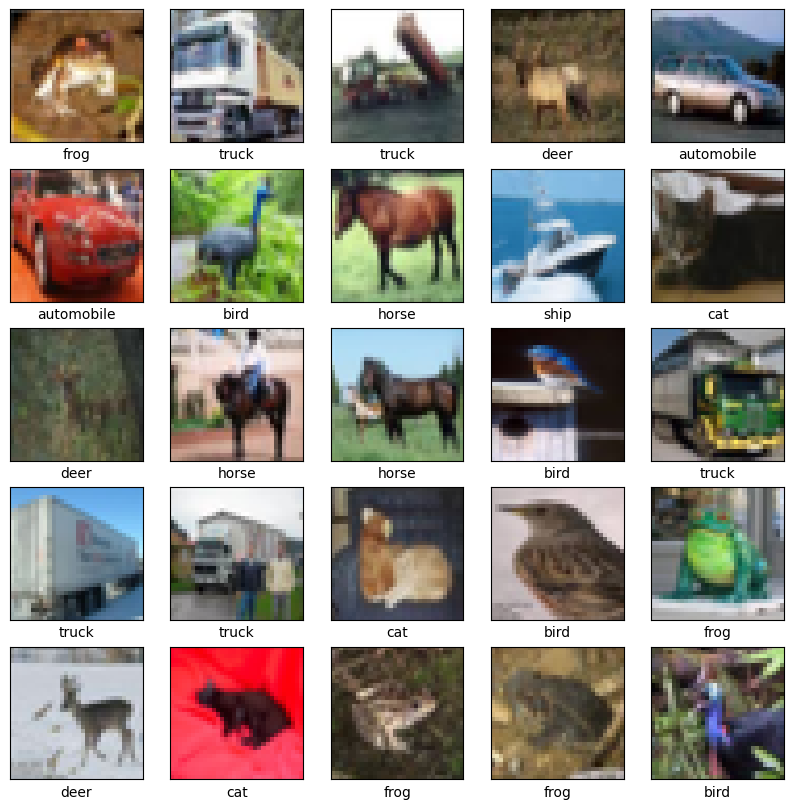

In [ ]:
# Konversi label kelas menjadi format biner
num_classes = 10
train_labels_bin = tf.keras.utils.to_categorical(train_labels, num_classes)
test_labels_bin = tf.keras.utils.to_categorical(test_labels, num_classes)

# Menampilkan beberapa contoh gambar
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i][0]])
plt.show()

CNN Model

In [ ]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 15, 15, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 6, 6, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 4, 4, 64)          36928     
                                                                 
 flatten_1 (Flatten)         (None, 1024)             

Kompilasi Model

In [ ]:
# Kompilasi model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

Melatih Model dan Evaluasi Model

In [ ]:
# Melatih model
history = model.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))

# Evaluasi model pada data pengujian
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('\nTest accuracy:', test_acc)

Epoch 1/10
1563/1563 [==============================] - 67s 42ms/step - loss: 1.5251 - accuracy: 0.4450 - val_loss: 1.2684 - val_accuracy: 0.5417
Epoch 2/10
1563/1563 [==============================] - 66s 42ms/step - loss: 1.1531 - accuracy: 0.5927 - val_loss: 1.0565 - val_accuracy: 0.6338
Epoch 3/10
1563/1563 [==============================] - 64s 41ms/step - loss: 0.9974 - accuracy: 0.6495 - val_loss: 0.9895 - val_accuracy: 0.6534
Epoch 4/10
1563/1563 [==============================] - 66s 42ms/step - loss: 0.8948 - accuracy: 0.6844 - val_loss: 0.9592 - val_accuracy: 0.6664
Epoch 5/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8247 - accuracy: 0.7120 - val_loss: 0.8955 - val_accuracy: 0.6835
Epoch 6/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7676 - accuracy: 0.7296 - val_loss: 0.8757 - val_accuracy: 0.6975
Epoch 7/10
1563/1563 [==============================] - 65s 42ms/step - loss: 0.7269 - accuracy: 0.7443 - val_loss: 0.8671 -

Loss dan Akurasi

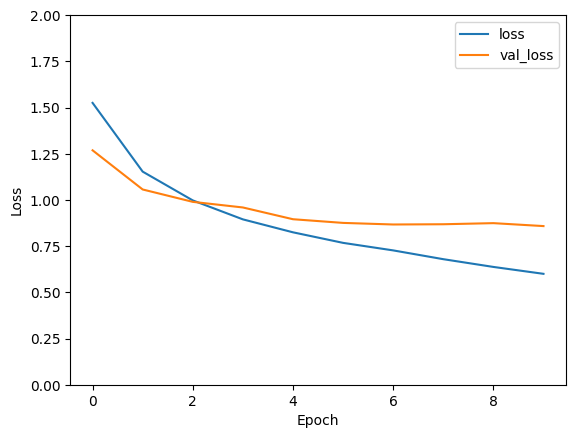

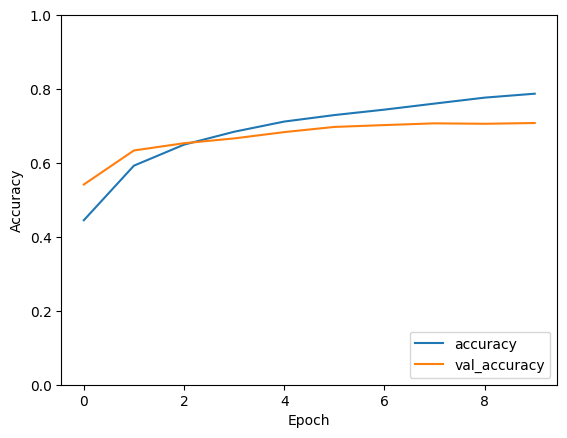

In [ ]:
# Menampilkan kurva loss
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 2])
plt.legend(loc='upper right')
plt.show()

print('\n')

# Menampilkan kurva akurasi
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')
plt.show()

Confusion Matriks

313/313 [==============================] - 8s 26ms/step


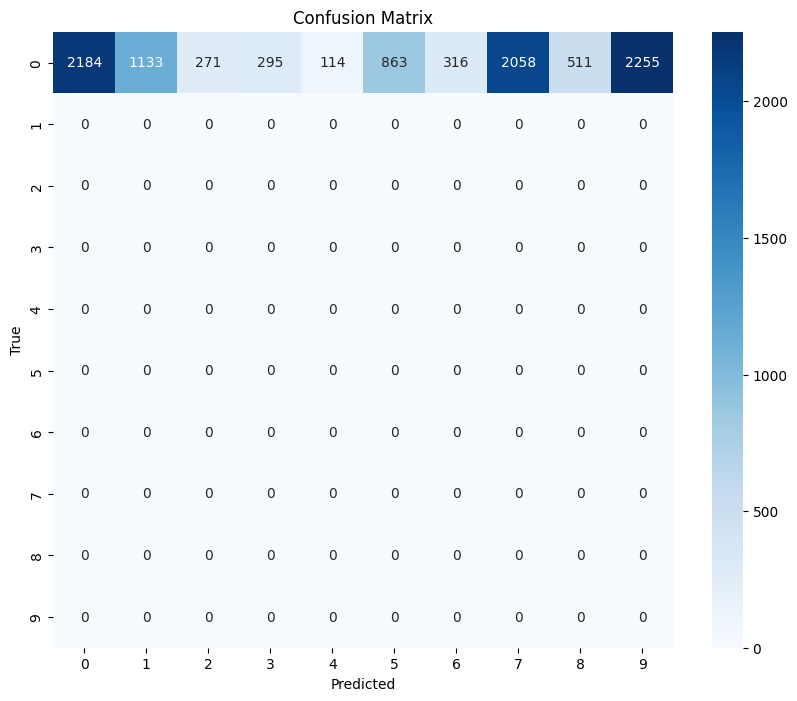

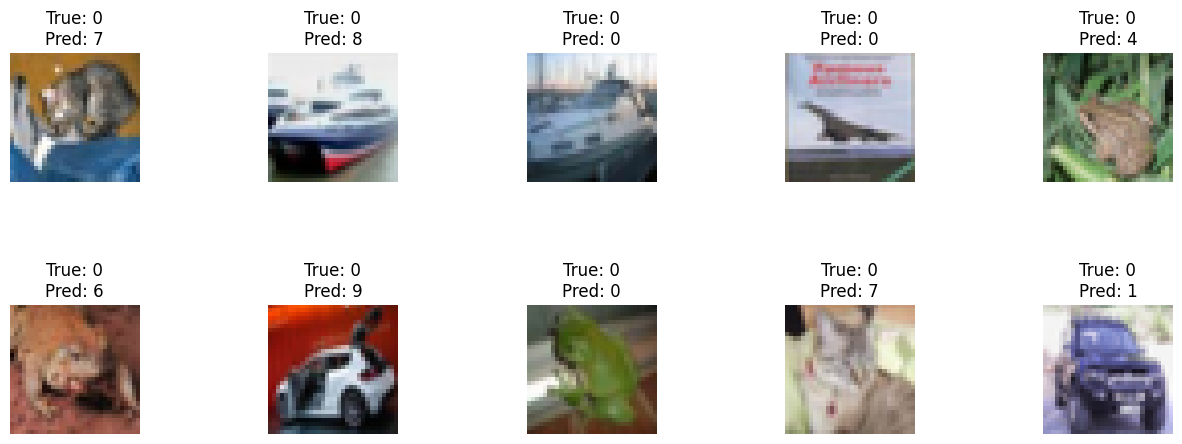

In [25]:
# Get predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Display some predictions
fig, axes = plt.subplots(2, 5, figsize=(15, 6))
axes = axes.ravel()
for i in np.arange(0, 10):
    axes[i].imshow(x_test[i])
    axes[i].set_title(f"True: {y_true[i]}\nPred: {y_pred_classes[i]}")
    axes[i].axis('off')
plt.subplots_adjust(wspace=1)
plt.show()